# Loading the Data

In [20]:
# load data



# import the experiment utilities package
import exputils as eu
import numpy as np


# create an experiment data loader, by default it will load data from '../experiments'
experiment_data_loader = eu.gui.jupyter.ExperimentDataLoaderWidget()


display(experiment_data_loader)
experiment_data_loader.load_data()

ExperimentDataLoaderWidget(children=(Box(children=(Button(description='Update Descriptions', layout=Layout(hei…

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/exputils/data/loading.py:185: UserWarning:

Could not find data for repetition 0 of experiment '000088' ('../experiments/experiment_000088'). Skipped ...

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/exputils/data/loading.py:185: UserWarning:

Could not find data for repetition 1 of experiment '000088' ('../experiments/experiment_000088'). Skipped ...

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/exputils/data/loading.py:185: UserWarning:

Could not find data for repetition 2 of experiment '000088' ('../experiments/experiment_000088'). Skipped ...

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/exputils/data/loading.py:185: UserWarning:

Could not find data for repetition 3 of experiment '000088' ('../experiments/experiment_000088'). Skipped ...

/Users/dajo/miniconda3/envs/urbf/lib/python3.11/site-packages/exputils/data/loading.py:185: UserWarning:

Could not find data for re

# Plotting the Data

In [14]:
# experiment data selection plotter that takes as input the data loader to plot its loaded data
experiment_data_plotter = eu.gui.jupyter.ExperimentDataPlotSelectionWidget(experiment_data_loader)
display(experiment_data_plotter)

ExperimentDataPlotSelectionWidget(children=(HBox(children=(Label(value='Data Sources:', layout=Layout(min_widt…

In [21]:
## plot the overall mean performance of 

import plotly.graph_objects as go
import matplotlib.colors as mcolors
import plotly.offline as pyo
import random

random.seed(6)

num_methods = 27

experiment_data = experiment_data_loader.experiment_data

method_results = {}
method_name = {}

method_durations = {}
method_params = {}


chunks = []
chunk_name = []


for key, val in experiment_data.items():  
    
    method_results[key] = []
    method_name[key] = experiment_data_loader.experiment_descriptions[key].name
    
    method_durations[key] = []
    method_params[key] = []
    
    for repetition_id, repetition_data in val['repetition_data'].items():
        epochs = repetition_data['epoch']
        
        val_loss = repetition_data['val_loss']
        test_loss = repetition_data['test_loss']

        min_val_idx = val_loss.argmin()
        min_val_test_loss = test_loss[min_val_idx]
                
        method_results[key].append(min_val_test_loss)
        method_durations[key].append(repetition_data['duration'])
        
        if 'params' in repetition_data:
            num_params = repetition_data['params']
        else:
            num_params = 0
        method_params[key].append(num_params)
        

    
# Extracting keys and values for the bar chart
categories = list(method_results.keys())
values = list(method_results.values())

### use average value:
values = [np.asarray(value).mean() for value in values]
### get names:å
categories = [method_name[key] for key in categories]
# Getting a list of named colors from matplotlib
named_colors = list(mcolors.CSS4_COLORS.keys())
random.shuffle(named_colors)
# Selecting the first 27 colors
colors = named_colors[:num_methods]

for frequency_chunk in range(3):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Performance for Dimension: {frequency_chunk + 1}",
        xaxis_title="Methods",
        yaxis_title="Min Val Test Loss"
    )

    # Displaying the figure
    fig.show()
    
    chunks.append(chunk_values)
    chunk_name.append(f"Dimension: {frequency_chunk + 1}")
    


# transpose!
chunks = list(map(list, zip(*chunks)))
    

# Create a trace for each line
traces = [go.Scatter(x=list(range(len(line))), y=line, mode='lines', name=chunk_names[i][2:]) for i, line in enumerate(chunks)]

# Define the layout of the chart
layout = go.Layout(
    title='Multiple Lines Chart',
    xaxis=dict(title='Dimension', tickvals=list(range(len(chunk_name))), ticktext=chunk_name),
    yaxis=dict(title='Loss',type='log')
)

# Create the figure and plot it
fig = go.Figure(data=traces, layout=layout)
fig.show() 


In [22]:
#### load data into dataframe
import numpy as np
import matplotlib.pyplot as plt
import traceback 

dataset_names = ['1','2','3']

method_grouping = {'svr': ['svr'],
 'pls': ['pls'],
 'gradboost': ['gradboost'],
 'mlp': ['mlp 0.01', 'mlp 0.001', 'mlp 0.0001'],
 'mrbf uniform': ['mrbf 0.01 uni',
  'mrbf 0.001 uni',
  'mrbf 0.0001 uni'],
 'mrbf fixed uniform': ['mrbf 0.01 fixed uni',
  'mrbf 0.001 fixed uni',
  'mrbf 0.0001 fixed uni'],
 'urbf uniform': ['urbf 0.01 uni',
  'urbf 0.001 uni',
  'urbf 0.0001 uni'],
 'urbf fixed uniform':[
  'urbf 0.01 fixed uni',
  'urbf 0.001 fixed uni',
  'urbf 0.0001 fixed uni'],
'ffn random': ['ffn_0.01_0.1 rand',
  'ffn_0.001_0.1 rand',
  'ffn_0.0001_0.1 rand',
  'ffn_0.01_1 rand',
  'ffn_0.001_1 rand',
  'ffn_0.0001_1 rand',
  'ffn_0.01_10 rand',
  'ffn_0.001_10 rand',
  'ffn_0.0001_10 rand'],
 'univariate ffn random': ['uffn_0.01_0.1 rand',
  'uffn_0.001_0.1 rand',
  'uffn_0.0001_0.1 rand',
  'uffn_0.01_1 rand',
  'uffn_0.001_1 rand',
  'uffn_0.0001_1 rand',
  'uffn_0.01_10 rand',
  'uffn_0.001_10 rand',
  'uffn_0.0001_10 rand'],}

method_names = [x
    for xs in list(method_grouping.values())
    for x in xs
]

print(len(method_names))

data = experiment_data_loader.experiment_data

_train_loss = {}
_test_loss = {}
_val_loss = {}

for method_id in list(data.keys()):
    method_data = data[method_id]['repetition_data']
    
    method_id = int(method_id)
    
    if method_id not in _train_loss:
        _train_loss[method_id] = []
        _test_loss[method_id] = []
        _val_loss[method_id] = []
    
    for rep_id in list(method_data.keys()):        
        _train_loss[method_id].append(method_data[rep_id]['train_loss'])
        _test_loss[method_id].append(method_data[rep_id]['test_loss'])
        _val_loss[method_id].append(method_data[rep_id]['val_loss'])
        
for key,val in _train_loss.items():
    try:
        _train_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass

for key,val in _test_loss.items():
    try:
        _test_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass
    
for key,val in _val_loss.items():
    try:
        _val_loss[key] = np.stack(val).transpose((1,0))
    except:
        pass

train_loss = {}  
test_loss = {}
val_loss = {}  
      
for dataset_idx, dataset in enumerate(dataset_names):
    train_loss[dataset] = {}
    test_loss[dataset] = {}
    val_loss[dataset] = {}

for key,val in _train_loss.items():
    
    dataset = dataset_names[int((key-1)/len(method_names))]
    method_key = method_names[(key-1) % len(method_names)]
    
    train_loss[dataset][method_key] = val

for key,val in _test_loss.items():
    
    dataset = dataset_names[int((key-1)/len(method_names))]
    method_key = method_names[(key-1) % len(method_names)]
    
    test_loss[dataset][method_key] = val

for key,val in _val_loss.items():
    
    dataset = dataset_names[int((key-1)/len(method_names))]
    method_key = method_names[(key-1) % len(method_names)]
    
    val_loss[dataset][method_key] = val


max_method_num = len(method_names)

min_test_loss = {}
min_val_test_loss = {}


for method in method_names:
    for dataset in dataset_names:
        print(f"Analyzing: {dataset} {method}")
        
        if method not in train_loss[dataset]:
            print(f"skipping: {method}")
            continue
        
        try:
            rep_min_test_loss = np.min(test_loss[dataset][method],axis=0)
            idx_min_val_loss = np.argmin(val_loss[dataset][method],axis=0)
            
            if dataset not in min_test_loss:
                min_test_loss[dataset] = {}
                
            if dataset not in min_val_test_loss:
                min_val_test_loss[dataset] = {}

            min_test_loss[dataset][method] = np.mean(rep_min_test_loss,axis=0)
                        
            _min_val_test_loss = []
            for rep,i in enumerate(idx_min_val_loss):
                _min_val_test_loss.append(test_loss[dataset][method][i,rep])
            
            min_val_test_loss[dataset][method] = np.mean(_min_val_test_loss)
            print(min_test_loss[dataset][method])
            
            
            
        except: 
            traceback.print_exc() 

            
### Calculate with reference to specific method
reference_method = method_names[2]

# Calculate relative min test loss
relative_min_test_loss = {}
relative_min_val_test_loss = {}

for dataset_name, dataset_vals in min_test_loss.items():
    relative_min_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}

for dataset_name, dataset_vals in min_val_test_loss.items():    
    relative_min_val_test_loss[dataset_name] = {method: val / dataset_vals[reference_method] for method, val in dataset_vals.items()}    

    
print(relative_min_val_test_loss.keys())


import pandas as pd

# Prepare the data for DataFrame
data_for_df = {}

for index, method in enumerate(method_names):
    data_for_df[method_names[index]] = []
    for dataset in dataset_names:
        loss = min_val_test_loss[dataset].get(method, None)
        data_for_df[method_names[index]].append(loss)

# Create the DataFrame
df = pd.DataFrame(data_for_df, index=dataset_names)


df

36
Analyzing: 1 svr
9777.711817709558
Analyzing: 2 svr
1489.3761781219437
Analyzing: 3 svr
288.03341413314854
Analyzing: 1 pls
9029.074215138895
Analyzing: 2 pls
1620.2085288413332
Analyzing: 3 pls
318.9401955906154
Analyzing: 1 gradboost
5659.170585825859
Analyzing: 2 gradboost
634.03379898019
Analyzing: 3 gradboost
232.19266546339787
Analyzing: 1 mlp 0.01
4920.4031982421875
Analyzing: 2 mlp 0.01
412.2825469970703
Analyzing: 3 mlp 0.01
1692.3672981262207
Analyzing: 1 mlp 0.001
5159.440979003906
Analyzing: 2 mlp 0.001
873.2714691162109
Analyzing: 3 mlp 0.001
2212.795539855957
Analyzing: 1 mlp 0.0001
7421.9744873046875
Analyzing: 2 mlp 0.0001
1467.593246459961
Analyzing: 3 mlp 0.0001
3099.522205352783
Analyzing: 1 mrbf 0.01 uni
2168.319737315178
Analyzing: 2 mrbf 0.01 uni
355.9098930358887
Analyzing: 3 mrbf 0.01 uni
2206.794725418091
Analyzing: 1 mrbf 0.001 uni
4406.556884765625
Analyzing: 2 mrbf 0.001 uni
775.7904663085938
Analyzing: 3 mrbf 0.001 uni
2849.956756591797
Analyzing: 1 mrbf

,svr,pls,gradboost,mlp 0.01,mlp 0.001,mlp 0.0001,mrbf 0.01 uni,mrbf 0.001 uni,mrbf 0.0001 uni,mrbf 0.01 fixed uni,...,ffn_0.0001_10 rand,uffn_0.01_0.1 rand,uffn_0.001_0.1 rand,uffn_0.0001_0.1 rand,uffn_0.01_1 rand,uffn_0.001_1 rand,uffn_0.0001_1 rand,uffn_0.01_10 rand,uffn_0.001_10 rand,uffn_0.0001_10 rand
1,9777.711818,9029.074215,5659.170586,5461.191711,6466.466980,7616.846680,2509.847488,5893.808403,7773.830872,4157.383362,...,8375.292847,7225.891296,6644.784607,7902.576599,3467.002960,3881.666168,7269.354187,9111.720215,8647.771729,8375.292847
2,1489.376178,1620.208529,634.033799,451.595631,881.359467,1467.593246,409.117382,853.484253,1424.359634,1433.594025,...,1595.002563,774.483154,1388.117004,1554.799072,122.975525,144.112663,1165.356659,1086.674347,963.232941,1296.381500
3,288.033414,318.940196,232.192665,1746.531329,2259.594921,3156.064976,2275.850140,2893.982468,3388.428242,4057.053856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


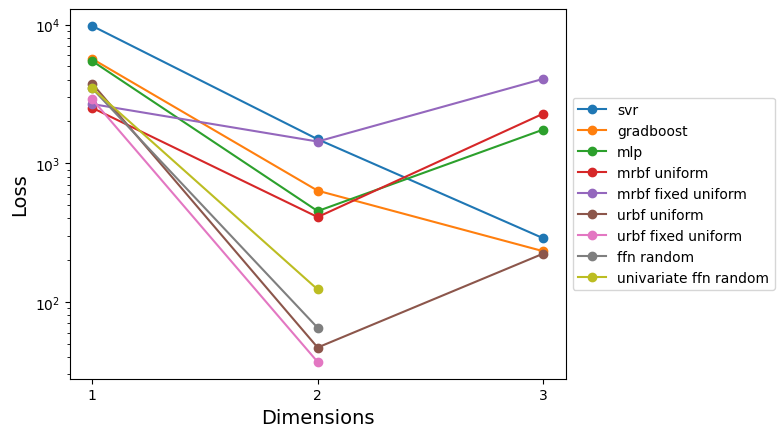

,svr,gradboost,mlp,mrbf uniform,mrbf fixed uniform,urbf uniform,urbf fixed uniform,ffn random,univariate ffn random
1,9777.711818,5659.170586,5461.191711,2509.847488,2672.426941,3753.726357,2893.970520,3467.002960,3467.002960
2,1489.376178,634.033799,451.595631,409.117382,1433.594025,46.873088,36.901573,65.049317,122.975525
3,288.033414,232.192665,1746.531329,2275.850140,4057.053856,222.665938,NaN,NaN,NaN


In [23]:
import pandas as pd


method_dict = method_grouping


# Prepare the data for the new DataFrame
data_for_reduced_df = {group: [] for group in method_dict}

# Iterating over each row in the DataFrame
for index, row in df.iterrows():
    for group, methods in method_dict.items():
        group_values = [row[method] for method in methods if method in row]
        # Find the minimum value for this group, if there are any values
        min_value = min(group_values) if group_values else None
        data_for_reduced_df[group].append(min_value)

# Create the new reduced DataFrame
reduced_df = pd.DataFrame(data_for_reduced_df, index=df.index)

reduced_df = reduced_df.drop('pls', axis=1)

# This 'reduced_df' will now have columns named after each method group, 
# with the lowest value from that group in each row.

# Plotting
for index, row in reduced_df.T.iterrows():
    plt.plot(row.index, row.values, '-o', label=f'{index}')

plt.title('')
plt.ylabel('Loss',fontsize=14)
plt.xlabel('Dimensions',fontsize=14)
plt.yscale('log')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


plt.savefig("../../../assets/dimension_sweep.pdf", format="pdf", bbox_inches='tight')


plt.show()

reduced_df

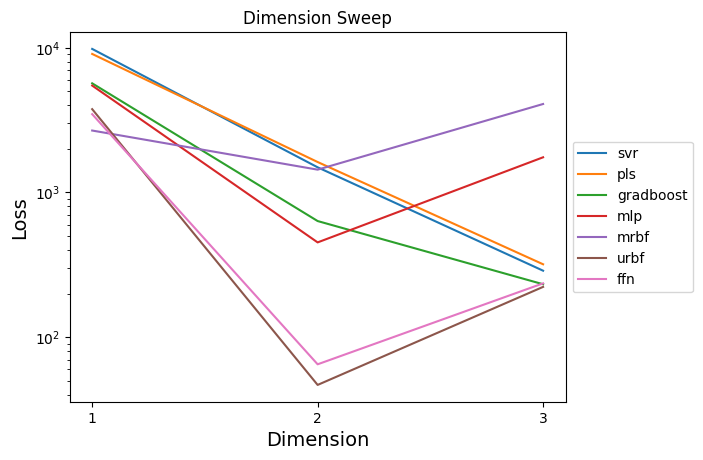

In [4]:
import matplotlib.pyplot as plt



top_method_renaming = {"svr":"svr","pls":"pls","gradboost":"gradboost", "mlp_001":"mlp","mrbf_0001_x10":"mrbf","urbf_001":"urbf","ffn_001_1":"ffn"}
top_methods = list(top_method_renaming.keys())

# Create a figure and an axis
fig, ax = plt.subplots()

# Plot each line
for i, line in enumerate(chunks):
    if chunk_names[i][2:] in top_methods:
        ax.plot(list(range(len(line))), line, label=top_method_renaming[chunk_names[i][2:]])

# Setting the title and labels
ax.set_title('Dimension Sweep')
ax.set_xlabel('Dimension', fontsize = 14)
ax.set_ylabel('Loss', fontsize = 14)

# Use logarithmic scale for y-axis
ax.set_yscale('log')

frequency_labels = [1,2,3]

# Setting x-axis ticks
ax.set_xticks(list(range(len(frequency_labels))))
ax.set_xticklabels(frequency_labels)

# Adding a legend
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [16]:
values = list(method_durations.values())
### use average value:
values = [np.asarray(value).mean() for value in values]

for frequency_chunk in range(3):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Duration for Dimension: {frequency_chunk + 1}",
        xaxis_title="Methods",
        yaxis_title="Duration"
    )

    # Displaying the figure
    fig.show()
    
   
    
    


In [12]:
values = list(method_params.values())
### use average value:
values = [np.asarray(value).mean() for value in values]

for frequency_chunk in range(4):
    
    chunk_values = values[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]
    chunk_names = categories[frequency_chunk*num_methods:(frequency_chunk+1)*num_methods]

    # Creating the bar chart
    fig = go.Figure(data=[go.Bar(x=chunk_names, y=chunk_values,marker_color=colors)])

    # Adding title and labels (you can modify these as needed)
    fig.update_layout(
        title=f"Method Params for Dimension: {frequency_chunk+1}",
        xaxis_title="Methods",
        yaxis_title="Params"
    )

    # Displaying the figure
    fig.show()